PROJECT OVERVIEW: 
Social media platform like twitter have become and integral part of modern communication, providing a platform for users to share Opinions,experiences and feedaback. It is important to monitor and understand customer sentiment on social media to maintain Brand Reputation and improving customer satisfaction.

PROBLEM STATEMENT:
Objective of the project is to perform Sentiment Analysis on Twitter US Airline to gain insight into customer perception of different US Airline. 

In [1]:
!pip install matplotlib -q
!pip install seaborn -q
!pip install wordcloud -q
!pip install beautifulsoup4==4.13.5 contractions==0.1.73 nltk==3.9.1 -q
!pip install scikit-learn

In [2]:
#install and import necessary libraries

import re,string,unicodedata                                    #import regex,string,unicode data
import numpy as np                                              #Import Numpy
import pandas as pd                                             #Import Pandas
import nltk                                                     #Import Natural Language tool-kit
import ssl
import wordcloud
import contractions
import matplotlib.pyplot as plt                                #Import plt for Visualization
from bs4 import BeautifulSoup

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('all')

from nltk.corpus import stopwords                                             #Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize                        #Import Tokenizer
#from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#Helps to display the images
from PIL import Image

#Helps to visualise the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Used in Stemming
from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split                           #Import train test split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics


from nltk.tokenize import sent_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/labuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/labuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/labuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/labuser/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/labuser/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/labuser/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/labuser/nltk_data...
[nltk_data]    |   Package averaged_perce

In [3]:
#LOADING THE DATASET
import pandas as pd
data=pd.read_csv('Tweets.csv')

In [4]:
#CHECKING THE SHAPE OF DATA
data.shape #Print shape of data

(14640, 15)

In [5]:
#[tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,

In [6]:
#VIEWING DATA (FIRST 5 ROWS)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
#VIEWING DATA(LAST 5 ROWS)
data.tail(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [8]:
#CHECKING DATA TYPE
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [9]:
#CHECKING DUPLICATE IN DATASET
data.duplicated().sum() #Cheakcing for duplicate values

36

In [10]:
#CHECKING FOR MISSING VALUES
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

OBSERAVATION:  1. There are toal 14640 rows and 15columns in the dataset.

In [11]:
#DROPPING DUPLICATE ROW
data.drop_duplicates(inplace=True)

In [12]:
#CHECKING SHAPE OF THE DATA AFTER DROPPING DUPLICATE
data.shape

(14604, 15)

In [13]:
#VIEWING THE DATA COLUMNS NAMES
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [14]:
#CHECKING FOR DUPLICATE VALUES
data["text"].isnull().sum()

0

OBSERVATION: 
There are 14604 records(rows) and 15 features(columns) in dataset.There are no null values in dataset.

Sentiment Distribution

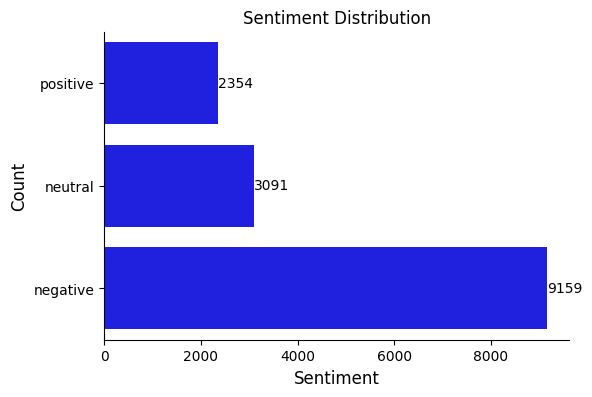

In [15]:
import seaborn as sns
plt.figure(figsize = (6,4))
y = sns.countplot(data['airline_sentiment'],order = ['positive','neutral','negative'], color = 'blue')
y.bar_label(y.containers[0])
sns.despine()
plt.xlabel('Sentiment',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Sentiment Distribution', fontsize = 12)
plt.show()

SENTIMENT DISTRIBUTION OBSERVATION:
1.There are 3 sentiment Positive,Neutral and Negative.
2.Sentiment distribution plot shows that the majority of tweets are negative followed by neutraal and then positive.
3.Which indicates more negative sentiment expressed towards US airline. 

/tmp/ipykernel_14529/2968172369.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:pink'` for the same effect.

  y = sns.countplot(data,x = 'airline',hue = 'airline_sentiment', color = 'pink')


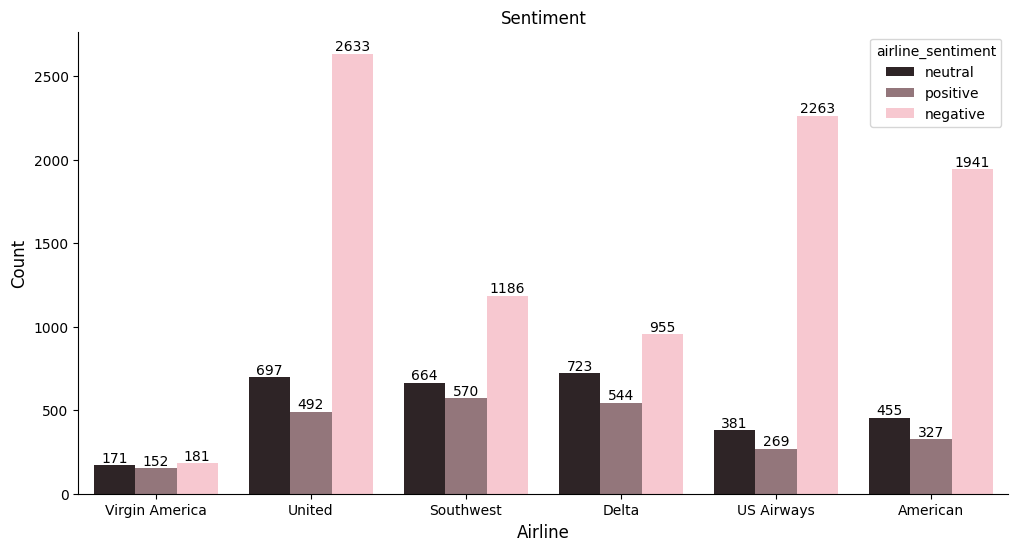

In [16]:
#SENTIMENT DISTRIBUTION BY ARILINE
plt.figure(figsize = (12,6))
y = sns.countplot(data,x = 'airline',hue = 'airline_sentiment', color = 'pink')
y.bar_label(y.containers[0])
y.bar_label(y.containers[1])
y.bar_label(y.containers[2])
sns.despine()
plt.xlabel('Airline',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Sentiment', fontsize = 12)
plt.show()

OBSERVATION: 
1. There are 6 different airlines 1. Virgin America 2. United 3.Southwest 4.Delta 5.US Airways 6.American
2. Most Negative sentiment is displayed on 3.United,5.US AIrways 6.American. Higher negative comments suggest customer ust be experiencing dissatisfaction with the services provided by above 3 airlines.
3. United,Southwest and Delta ailines also have negative sentiment but the nature of the garph is balances, they have areas of improvement at the same time they have balance in positive sentiment.

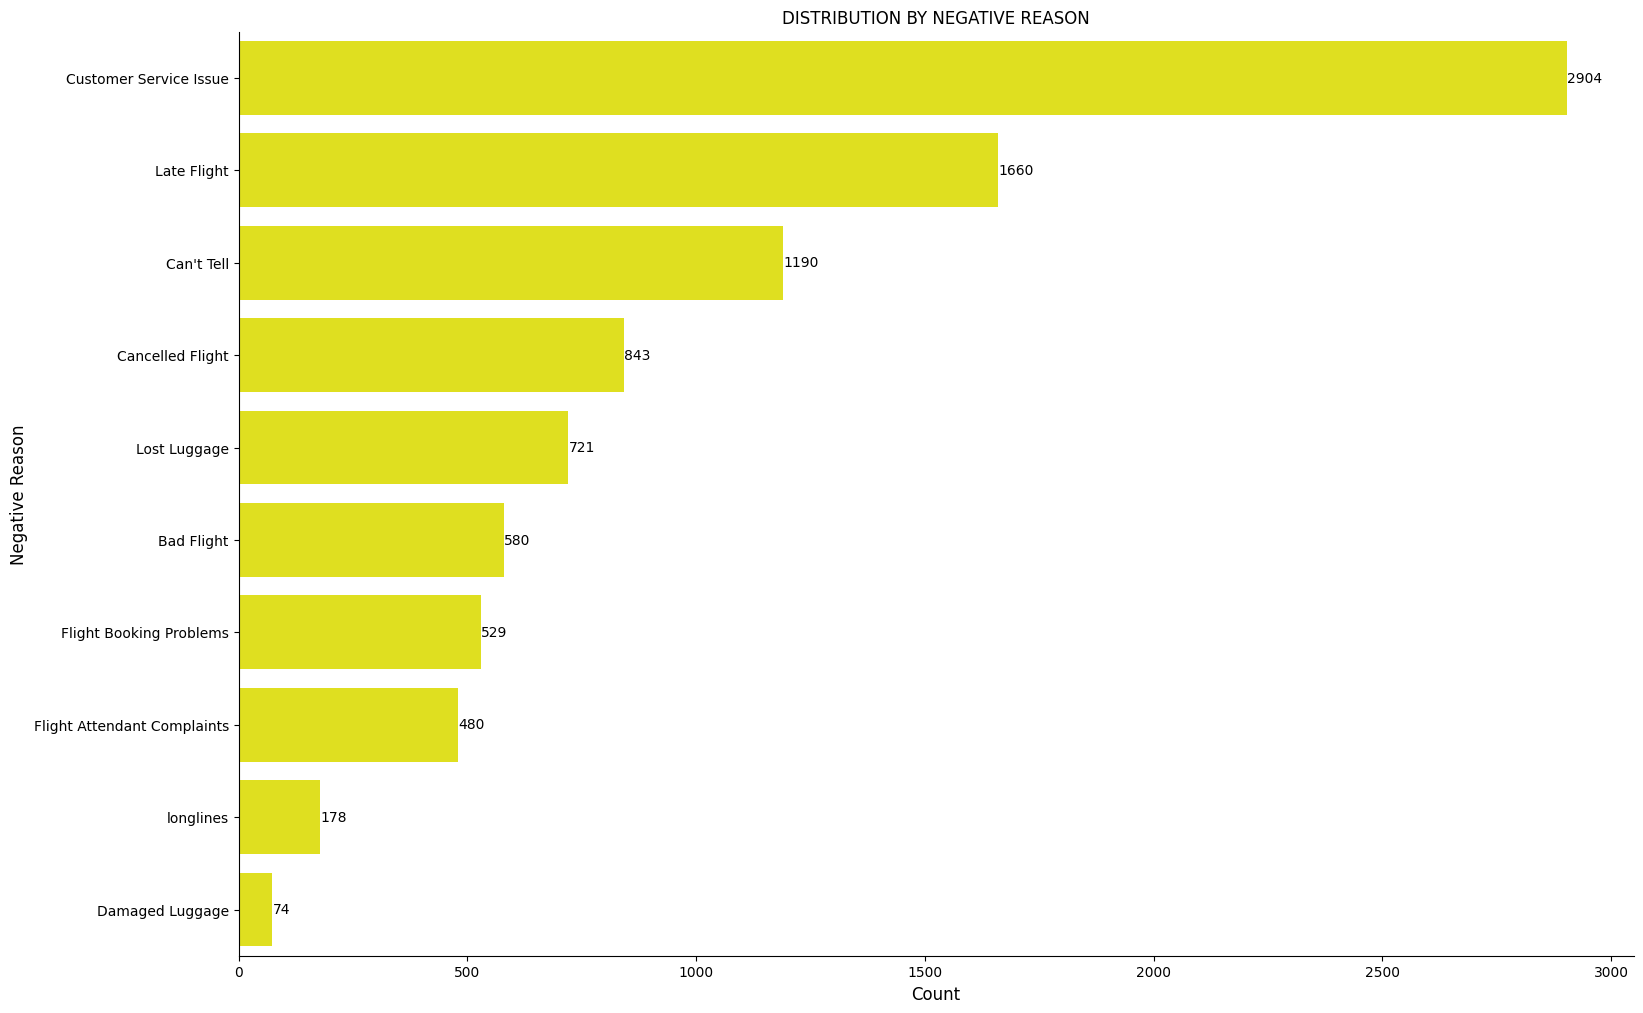

In [17]:
#SENTIMENT DISTRIBUTION BY NEGATIVE REASON
plt.figure(figsize = (18,12))
y = sns.countplot(data,y = 'negativereason',order = data['negativereason'].value_counts().index, color = 'yellow')
y.bar_label(y.containers[0])
sns.despine()
plt.ylabel('Negative Reason',fontsize = 12)
plt.xlabel('Count', fontsize = 12)
plt.title('DISTRIBUTION BY NEGATIVE REASON', fontsize = 12)
plt.show()

OBSERVATION of DISTRIBUTION BY NEGATIVE NUMBER: 
1.Maximum number of negative sentiment is received for 'Customer Service Issues','Late Flight','Cancelled Flight,'Flight booking'. 
2. By addresing above issues customer experience can be improvised.some strategies can be implemented to improve service quality,communication,Overall customer satisfaction.


In [18]:
#PLOTTING THE WORD CLOUD GRAPH FOR POSITIVE AND NEGATIVE SENTIMENT

In [19]:
#CREATING WORD CLOUD FOR NEGATIVE tweets
def show_wordcloud(data,airline_sentiment):
    tweets = data[data['airline_sentiment']== airline_sentiment]
    text = ''.join(tweets['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    wordcloud_negative = wordcloud.WordCloud(stopwords=stopwords,colormap='plasma').generate(text)
    plt.figure(figsize=(14,11),frameon=True)
    plt.imshow(wordcloud_negative)
    plt.show

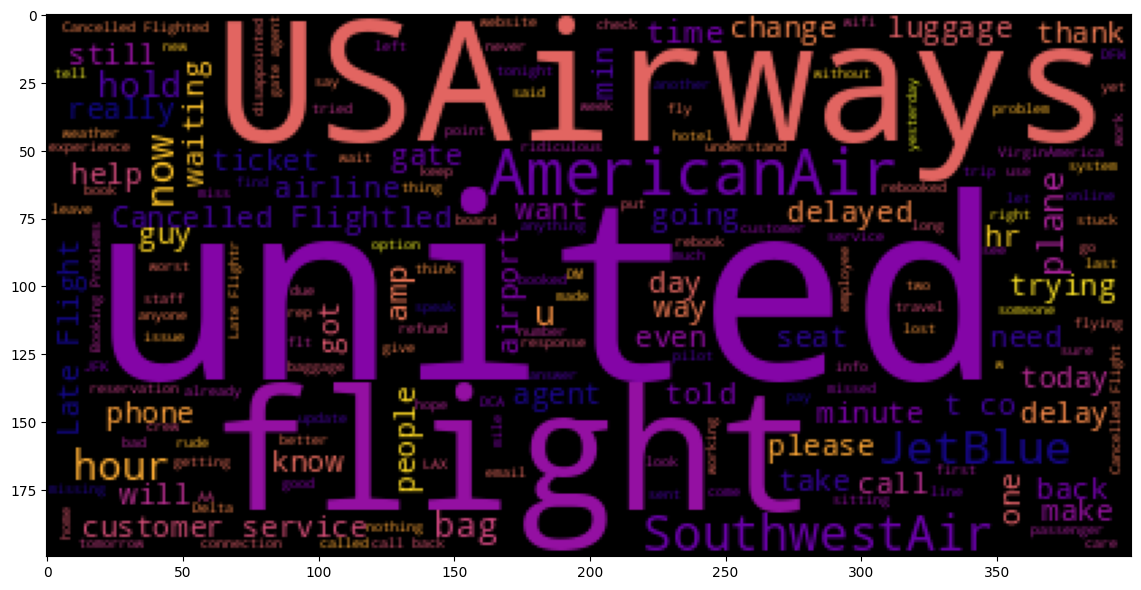

In [20]:
show_wordcloud(data,'negative')

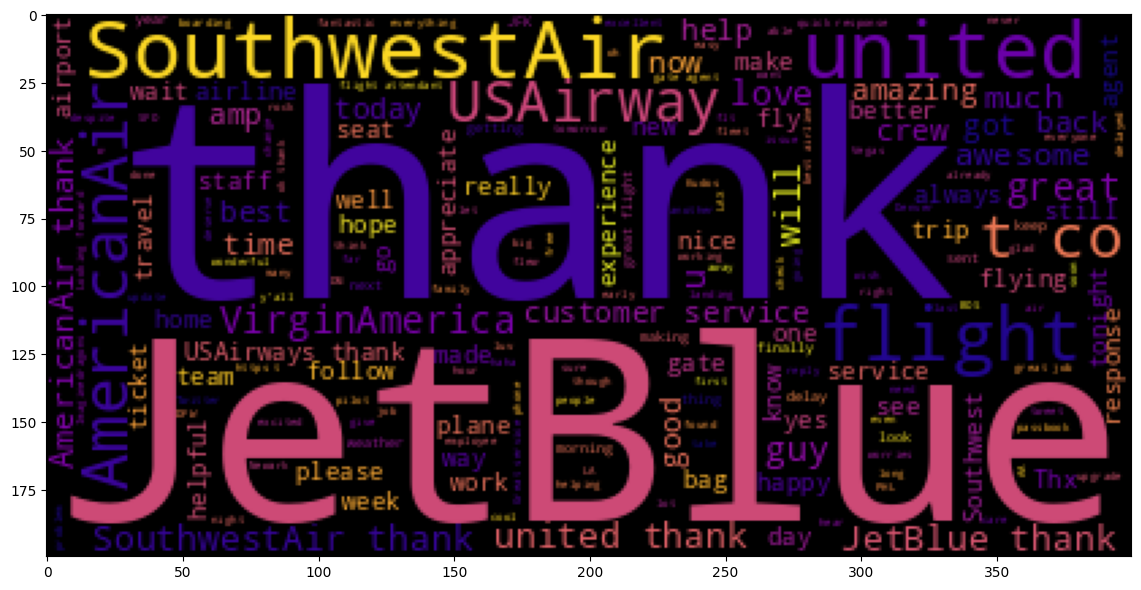

In [21]:
show_wordcloud(data,'positive')

In [22]:
#Dropping unncessary column
data.drop(columns=['tweet_id','airline_sentiment_confidence','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone',],inplace=True)

In [23]:
#CHEKCING THE DATASET AFTER DROPPING COLUMNS
data.columns

Index(['airline_sentiment', 'negativereason', 'text'], dtype='object')

In [24]:
#CHecking shape of dat
data.shape

(14604, 3)

In [25]:
def strip_html(text):
    soup =BeautifulSoup(text,"html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
#data['negativereason']= data['negativereason'].apply(lambda x: strip_html(x))

data.head()



,airline_sentiment,negativereason,text
0,neutral,NaN,@VirginAmerica What @dhepburn said.
1,positive,NaN,@VirginAmerica plus you've added commercials t...
2,neutral,NaN,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,@VirginAmerica and it's a really big bad thing...


In [26]:
def replace_contractions(text):
    """replace contractions in string of text"""
    return contractions.fix(text)


data['text'] = data['text'].apply(lambda x: replace_contractions(x))
#data['negativereason']= data['negativereason'].apply(lambda x: strip_html(x))

data.head()



,airline_sentiment,negativereason,text
0,neutral,NaN,@VirginAmerica What @dhepburn said.
1,positive,NaN,@VirginAmerica plus you have added commercials...
2,neutral,NaN,@VirginAmerica I did not today... Must mean I ...
3,negative,Bad Flight,@VirginAmerica it is really aggressive to blas...
4,negative,Can't Tell,@VirginAmerica and it is a really big bad thin...


In [27]:
def remove_numbers(text):
    text = re.sub(r'\d+','',text)
    return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
#data['negativereason']= data['negativereason'].apply(lambda x: strip_html(x))

data.head()

,airline_sentiment,negativereason,text
0,neutral,NaN,@VirginAmerica What @dhepburn said.
1,positive,NaN,@VirginAmerica plus you have added commercials...
2,neutral,NaN,@VirginAmerica I did not today... Must mean I ...
3,negative,Bad Flight,@VirginAmerica it is really aggressive to blas...
4,negative,Can't Tell,@VirginAmerica and it is a really big bad thin...


In [28]:
nltk.download('punkt_tab')
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']),axis=1) #Tokenization of data

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/labuser/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [29]:
data.head() #Tokenised data display

,airline_sentiment,negativereason,text
0,neutral,NaN,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,NaN,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,NaN,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,Bad Flight,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,Can't Tell,"[@, VirginAmerica, and, it, is, a, really, big..."


In [30]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
              
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
stopwords = stopwords.words('english')

customlist = ['not',"couldn't",'didn',"didn't",'doesn',"doeesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'shan', "shan't", 'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

#set custom stop-word's list as not, couldn't etc words matter in sentiment,so no removing them from original data.

stopwords = list(set(stopwords) - set(customlist))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/labuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/labuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/labuser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    "Remove non-ASCII characters from list of tokenized words"""
    new_words= []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii','ignore').decode('utf-8','ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words= []
    for word in words:
        new_word = re.sub(r'[^\w\s]','',word)
        if new_word!='':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis =1)
data.head()
    

,airline_sentiment,negativereason,text
0,neutral,NaN,virginamerica dhepburn say
1,positive,NaN,virginamerica plus add commercials experience ...
2,neutral,NaN,virginamerica not today must mean need take an...
3,negative,Bad Flight,virginamerica really aggressive blast obnoxiou...
4,negative,Can't Tell,virginamerica really big bad thing


MODEL BUILDING

In [32]:
#Vectorization (Covert text data to numbers).
#import sklearn
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features =2000) #Keep only 2000 features
data_features = bow_vec.fit_transform(data['text'])

data_features = data_features.toarray()   #convert data features to array



In [33]:
data_features.shape


(14604, 2000)

In [34]:
#converting airline sentiment labels to number
data['airline_sentiment']=data.airline_sentiment.map({'positive':0,'negative':1,'neutral':2})
data.head(5)

,airline_sentiment,negativereason,text
0,2,NaN,virginamerica dhepburn say
1,0,NaN,virginamerica plus add commercials experience ...
2,2,NaN,virginamerica not today must mean need take an...
3,1,Bad Flight,virginamerica really aggressive blast obnoxiou...
4,1,Can't Tell,virginamerica really big bad thing


In [35]:
#Split data in training and test data set
#from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(data_features,data.airline_sentiment,test_size=0.3, random_state=2)

In [36]:
#Using RANDOM FOREST TO BUILD MODEL FOR THE CLASSIFICATION OF REVIEWS
#ALSO CALULATING THE CROSS VALIDATION SCORE

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, data.airline_sentiment, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7135694729637234


OPTIMIZING THE PARAMETER: Number of trees in the random forest model(n_estimators)

In [37]:
#Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1,25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [38]:
#K-fold cross Validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    print(f"Creating a classifier with {b} base learners")
    scores = cross_val_score(clf,X_train,y_train, cv=5,scoring='accuracy')
    cv_scores.append(scores.mean())
    

Creating a classifier with 1 base learners
Creating a classifier with 2 base learners
Creating a classifier with 3 base learners
Creating a classifier with 4 base learners
Creating a classifier with 5 base learners
Creating a classifier with 6 base learners
Creating a classifier with 7 base learners
Creating a classifier with 8 base learners
Creating a classifier with 9 base learners
Creating a classifier with 10 base learners
Creating a classifier with 11 base learners
Creating a classifier with 12 base learners
Creating a classifier with 13 base learners
Creating a classifier with 14 base learners
Creating a classifier with 15 base learners
Creating a classifier with 16 base learners
Creating a classifier with 17 base learners
Creating a classifier with 18 base learners
Creating a classifier with 19 base learners
Creating a classifier with 20 base learners
Creating a classifier with 21 base learners
Creating a classifier with 22 base learners
Creating a classifier with 23 base learne

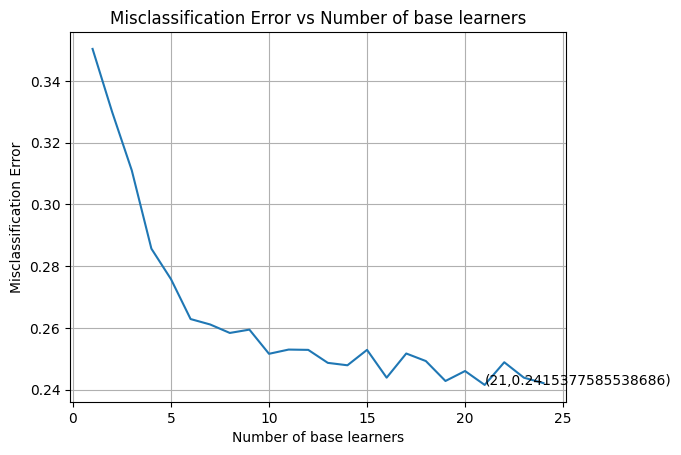

In [39]:
#PLOTTING THE ERROR AS K INCREASES
error = [1-x for x in cv_scores]
optimal_learners = base_ln[error.index(min(error))]
plt.plot(base_ln,error)
xy= (optimal_learners,min(error))
plt.annotate('(%s,%s)' % xy,xy=xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.title("Misclassification Error vs Number of base learners")
plt.grid(True)
plt.show()

In [40]:
#Training the best model and calculating accuracy on the test data
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7549064354176175

In [41]:
result =clf.predict(X_test) #Saving the prediction on the test data as a result

[[ 440  178  135]
 [  68 2439  191]
 [ 101  401  429]]
0.7549064354176175


<Axes: >

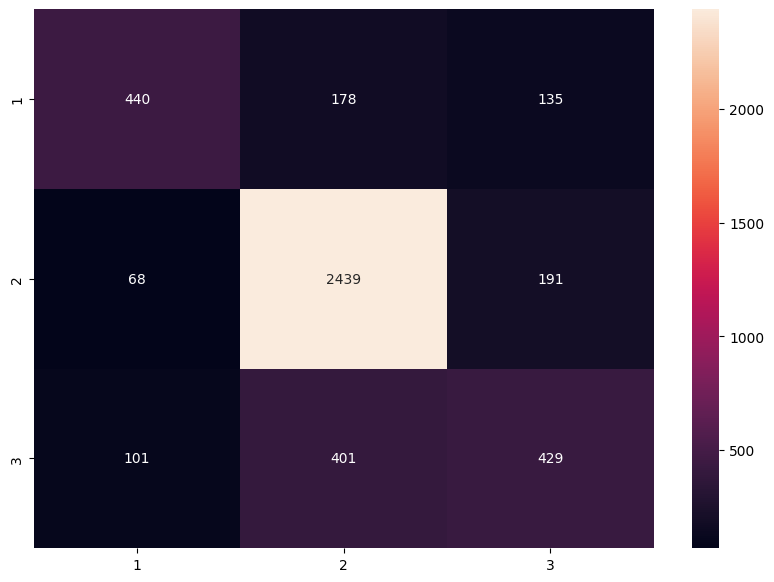

In [42]:
#Print and plot confusion matrix to get an idea of how the distribution of the prediction is, among all the classes
conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

dm_cm = pd.DataFrame(conf_mat, index=[i for i in "123"],
                     columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(dm_cm, annot=True, fmt='g')

WORD CLOUD of TOP 20 IMPORTANT FEATURES FROM THE COUNTVECTORIZER+ RANDOMFOREST BASED MODEL

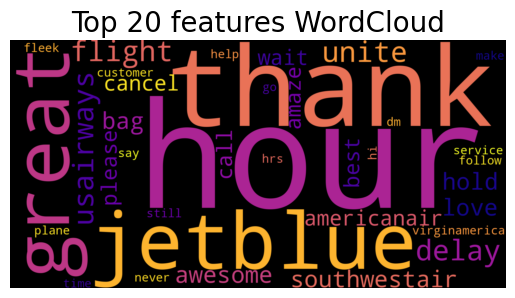

In [43]:
all_features = bow_vec.get_feature_names_out()
top_features=''
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black", colormap='plasma', width=2000,height=1000).generate(top_features)

#DISPLAY the genrated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14,11), frameon ='equal')
plt.title('Top 20 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

TERM FREQUENCY(TF)- INVERSE DOCUMENT FREQUENCY(IDF)


In [44]:
#from sklearn.features_extraction.text import TfidVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14604, 2000)

In [45]:
#Split data into trainign and testing set.

X_train, X_test, y_train, y_test = train_test_split(data_features, data.airline_sentiment, test_size=0.3, random_state=42)

In [46]:
#Using RAANDOME FOREST TO BUILD MODEL FOR THE CLASSIFICATION OF REVIEWS.
#ALSO CALCULATING THE CROSS VALIDATION SCORE

import numpy as np

forest = RandomForestClassifier(n_estimators=10,n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features,data.airline_sentiment,cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7165806400195024


In [47]:
#K-fold cross validation
cv_scores=[]
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    print(f"Creating a classifier with {b} base learners")
    scores = cross_val_score(clf, X_train, y_train, cv =10, scoring ='accuracy')
    cv_scores.append(scores.mean())

Creating a classifier with 1 base learners
Creating a classifier with 2 base learners
Creating a classifier with 3 base learners
Creating a classifier with 4 base learners
Creating a classifier with 5 base learners
Creating a classifier with 6 base learners
Creating a classifier with 7 base learners
Creating a classifier with 8 base learners
Creating a classifier with 9 base learners
Creating a classifier with 10 base learners
Creating a classifier with 11 base learners
Creating a classifier with 12 base learners
Creating a classifier with 13 base learners
Creating a classifier with 14 base learners
Creating a classifier with 15 base learners
Creating a classifier with 16 base learners
Creating a classifier with 17 base learners
Creating a classifier with 18 base learners
Creating a classifier with 19 base learners
Creating a classifier with 20 base learners
Creating a classifier with 21 base learners
Creating a classifier with 22 base learners
Creating a classifier with 23 base learne

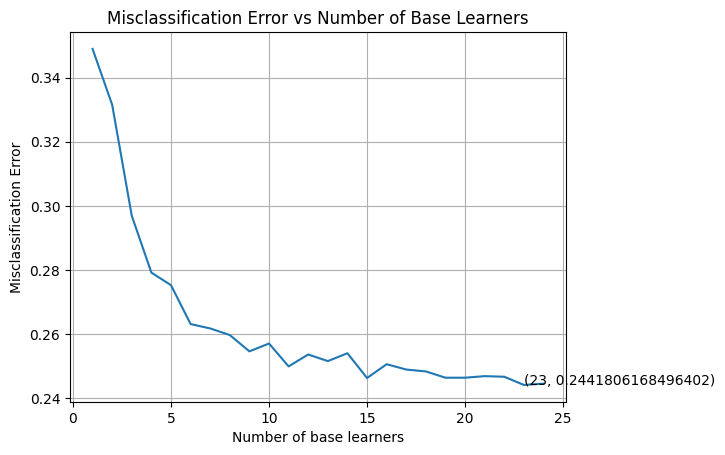

In [48]:
#Plotting the error as k increases
error = [1-x for x in cv_scores]
optimal_learners = base_ln[error.index(min(error))]
plt.plot(base_ln,error)
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' %xy, xy =xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.title("Misclassification Error vs Number of Base Learners")
plt.grid(True)
plt.show()

In [49]:
#Training the best model and calculating error on test data.
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train,y_train) 
clf.score(X_test,y_test)

0.7695116385212232

In [50]:
result=clf.predict(X_test)

[[ 390  217   94]
 [  57 2612  127]
 [  73  442  370]]
0.7695116385212232


<Axes: >

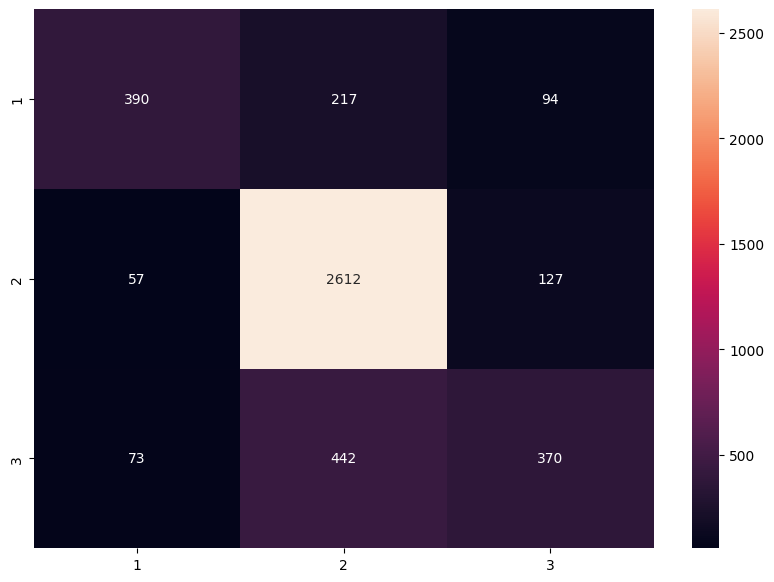

In [51]:
#Print and plot confusion matrix to get an idea of how the distribution of the prediction is, among all the classes
conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

dm_cm = pd.DataFrame(conf_mat, index=[i for i in "123"],
                     columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(dm_cm, annot=True, fmt='g')

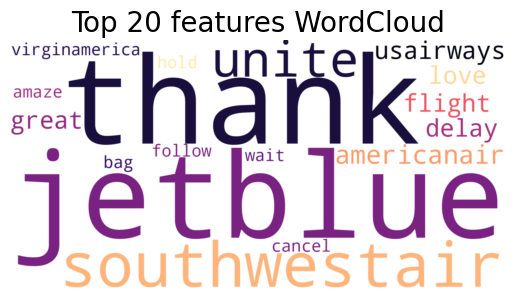

In [52]:
all_features = vectorizer.get_feature_names_out()
Top_features=''
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:20]:
    Top_features+=all_features[i]
    Top_features+=' '

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", colormap='magma', width=2000,height=1000).generate(Top_features)

#DISPLAY the genrated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14,11), frameon ='equal')
plt.title('Top 20 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

CONCLUSION: We used dataset that reviwes in grid format, we generated sentiment alanysis as per the sentiment category.Apllied the sentiment category for Airlines as well.We preprocessed the data  and used classifications methods as 'CountVectoriser' and 'TFIDF'.